# Wasserstein GAN (WGAN)

Problem: __instability of GAN training__.

## GAN problems

GAN training is __unstable__, the following happens.

### Vanishing gradient

When the discriminator converges,  
__gradients propagated to the generator become flat__.

Main cause:  
  _GAN is based on __KL-divergence__ and __JS-divergence__, those have zero gradient near zero._

### Mode collapse

The generator learns to generate only one mode of the dataset (say, the digit '1').

Main cause:  
  the loss function does not enforce full pdf coverage.

## WGAN-GP improvements

Many improvements proposed on GANs.

### The critique

On major cause of __vanishing gradient__ is the __sigmoid function__.

The __critique does not generate probabilities__ (in $[0,1]$).

This pretends to __substitute the binary cross-entropy__ from the loss.

### The lipschitz condition

__Uncontrolled gradients prevent convergence__.

- __JSD__: Jensen-Shannon divergence.  
  __Symmetrized KL__-divergence.
- __EMD__: Earth-Mover (Wasserstein) distance.  
  Intuitively, __probability mass to be moved__ to transform a distribution into another.
  
  $$\Large W(p_r, p_g) = \inf\mathbb{E}_{x\sim p_r, y\sim p_g}[\|x-y\|]$$

<img src="images/WGAN_EM.png" width="600pt"/>

Comparison of EMD and JSD:

<img src="images/WGAN_gradients.png" width="600pt"/>

Conditions for EMD to behave correctly: __$g(z)$ Lipschitz__.

<img src="images/WGAN_theorem.png" width="600pt"/>

### The loss

__WGAN__: skipping the derivation (see theorem 3 in the [paper](https://arxiv.org/pdf/1701.07875.pdf)).

$$\Large
\max_{\|D\|_L\leq1}\mathcal{L}(D) = \max_{\|D\|_L\leq1}
  \mathbb{E}_{\tilde{x}\sim p_g}[D(\tilde{x})] 
- \mathbb{E}_{x\sim p_r}[D(x)]
$$

Problem: $D$ must be Lipschitz.

__Enforced in WGAN by weight clipping__.

__WGAN-GP__: Idea, penalize the gradients in the loss. See the [paper](https://arxiv.org/pdf/1704.00028.pdf).

$$\Large
\mathcal{L}(D) = 
\mathbb{E}_{\tilde{x}\sim p_g}[D(\tilde{x})] 
- \mathbb{E}_{x\sim p_r}[D(x)]
+\lambda \mathbb{E}_{\hat{x}\sim p_{\hat{x}}}[(\|\nabla_\hat{x}D(\hat{x})\|_2-1)^2]
$$

where $p_{\hat{x}}$ spans uniformly straight lines between $p_r$ and $p_g$.

<img src="images/WGAN_penalty.png" width="600pt"/>

### The architecture

Minor architecture improvements:

- striding instead of max-pooling;
- transposed convolutions;
- batch normalizations.

### The optimization

- Many steps on $D$ beforem moving $G$;
- Adam with removed exponential decay rate estimate (first moment), reduced the second.

In [2]:
%load_ext autoreload

Generator parameters: 10747
Critic parameters: 6269


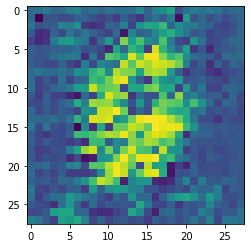

Epoch: 1, losses (G,Ctr,Cte): 1.9387129117811925, -1.3831556250196275, -1.4945482569894972


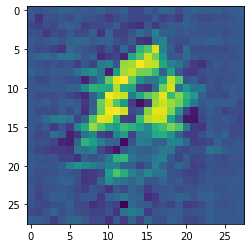

Epoch: 2, losses (G,Ctr,Cte): 3.474153415404539, -1.2913693316709767, -0.8769379759290415


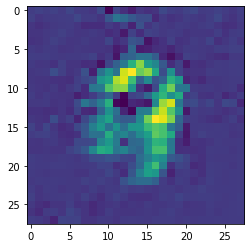

Epoch: 3, losses (G,Ctr,Cte): 2.8483537403657473, -0.5920262972174931, -0.41869003833479185


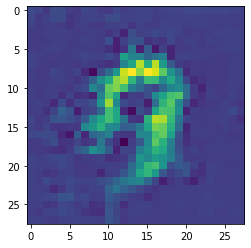

Epoch: 4, losses (G,Ctr,Cte): 4.153699094598943, -0.25672358087003866, -0.21119641897025382


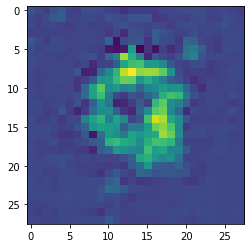

Epoch: 5, losses (G,Ctr,Cte): 4.641117205594313, -0.1566823568107731, -0.1364423247279635


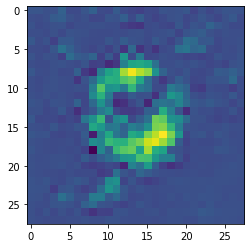

Epoch: 6, losses (G,Ctr,Cte): 5.435038515590729, -0.13760784957835923, -0.11087024249848287


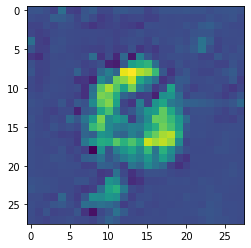

Epoch: 7, losses (G,Ctr,Cte): 5.668345198911779, -0.12631369301123913, -0.15976918446030586


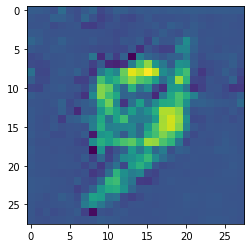

Epoch: 8, losses (G,Ctr,Cte): 5.935756555853043, -0.19892099917506867, -0.2150055851526321


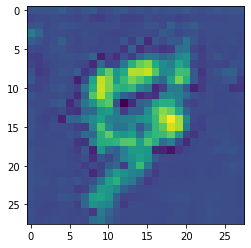

Epoch: 9, losses (G,Ctr,Cte): 6.500976468152541, -0.27953526922571126, -0.2623799200270586


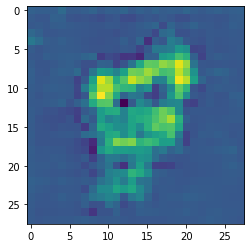

Epoch: 10, losses (G,Ctr,Cte): 6.644065461694238, -0.26962959652008023, -0.2338209017446846


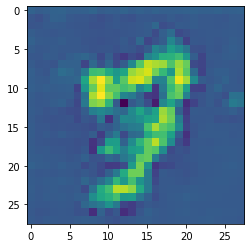

Epoch: 11, losses (G,Ctr,Cte): 6.785706351785099, -0.23086262108293423, -0.19240016997999446


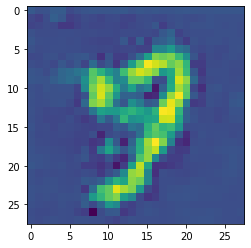

Epoch: 12, losses (G,Ctr,Cte): 6.889197543343121, -0.23258782262359856, -0.28703482876158065


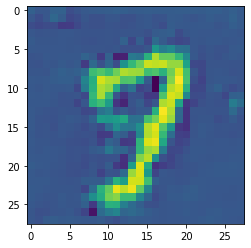

Epoch: 13, losses (G,Ctr,Cte): 7.3346396283032425, -0.25873069075950933, -0.286764107597102


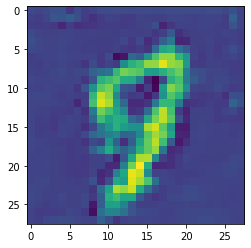

Epoch: 14, losses (G,Ctr,Cte): 7.863612259135527, -0.26677857574496444, -0.28875707232268755


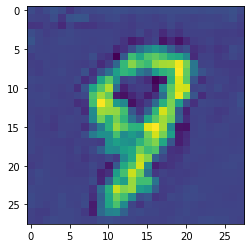

Epoch: 15, losses (G,Ctr,Cte): 8.581480918721082, -0.2611886057009829, -0.3058017141120449


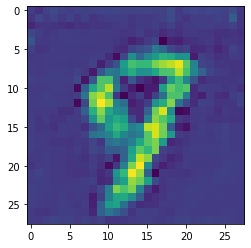

Epoch: 16, losses (G,Ctr,Cte): 9.84027291874197, -0.27904941273460004, -0.29022253233536033


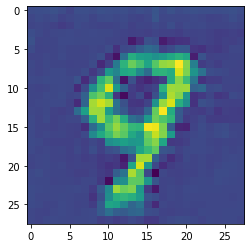

Epoch: 17, losses (G,Ctr,Cte): 10.491177609897552, -0.3046748349502651, -0.2987913255858573


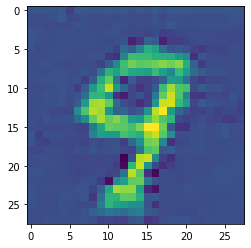

Epoch: 18, losses (G,Ctr,Cte): 10.374767757354574, -0.32232248513047884, -0.3418570835689071


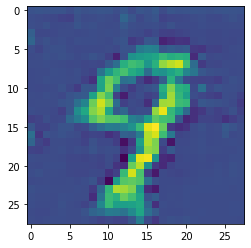

Epoch: 19, losses (G,Ctr,Cte): 10.41378877507174, -0.32346090026247476, -0.3026143042904556


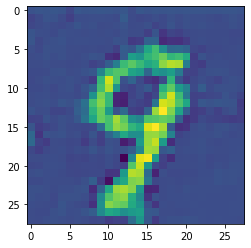

Epoch: 20, losses (G,Ctr,Cte): 10.701578685944092, -0.3220697819296993, -0.3318922516836482


In [11]:
%autoreload

from WGAN import train

# Training on MNIST:
generator, critic, fakes, train_generator_losses, train_critic_losses, test_critic_losses = train(
    epochs=20, 
    critic_iterations=5,
    lr=3e-4
)

In [61]:
from GAN import save_model

losses = [train_generator_losses, train_critic_losses, test_critic_losses]
save_model(
    'generated/wgan/',
    generator, critic,
    fakes, losses
)

In [66]:
from WGAN import Critic, Generator
from GAN import load_model

generator, critic, fakes, losses = load_model(
    'generated/wgan/', Generator(), Critic())
train_generator_losses, train_critic_losses, test_critic_losses = losses

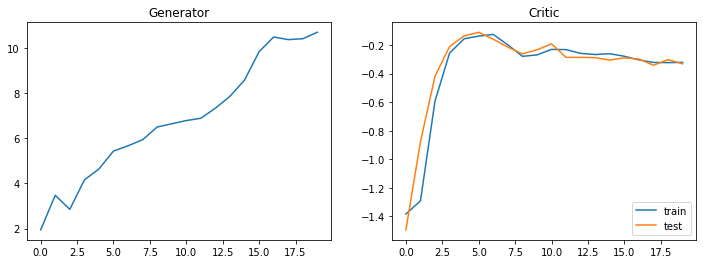

In [67]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(train_generator_losses)
ax[0].set_title('Generator')
ax[1].plot(train_critic_losses)
ax[1].plot(test_critic_losses)
ax[1].set_title('Critic')
ax[1].legend(['train','test']);

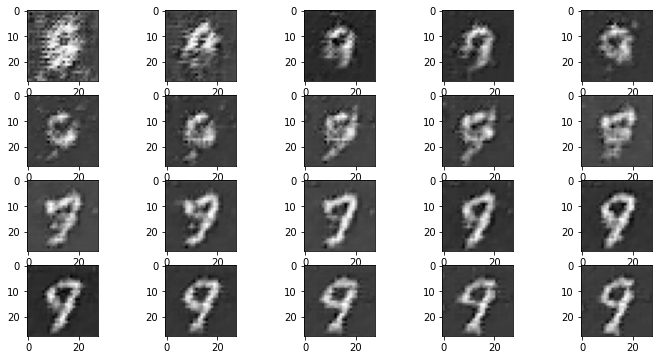

In [35]:
from matplotlib import pyplot as plt

# The fakes sequence:
cols = 5
rows = len(fakes)//cols
_, ax = plt.subplots(rows, cols, figsize=(12,6))
for r in range(rows):
    for c in range(cols):
        ax[r,c].imshow(fakes[r*cols+c], cmap='gray')

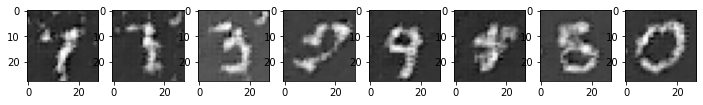

In [47]:
import torch
from matplotlib import pyplot as plt

# Generating data:
n = 8
xfake = generator(torch.rand((n,16)))
_, ax = plt.subplots(1, n, figsize=(12,4))
with torch.no_grad():
    for i in range(n):
        img = xfake[i]
        ax[i].imshow(img.permute(1,2,0), cmap='gray')

## [$R_1$ regularization](https://arxiv.org/pdf/1801.04406v4.pdf)

Study of _Dirac-GAN_ parameters to evaluate GAN convergence:

- __real data__: $\delta_0$
- __generated data__: $\delta_\theta$
- __discriminator__: $\psi \cdot x$

<img src="images/GAN_dirac.png" width="700pt"/>

As an example consider the criterion: $\mathcal{L} = \psi \cdot x_g + \psi \cdot x_r = \psi \cdot \theta$

- the discriminator maximizing $\mathcal{L}$ moves as $\frac{\partial\mathcal{L}}{\partial\psi} = \theta$
- the generator minimizing $\mathcal{L}$ moves as $-\frac{\partial\mathcal{L}}{\partial\theta} = -\psi$

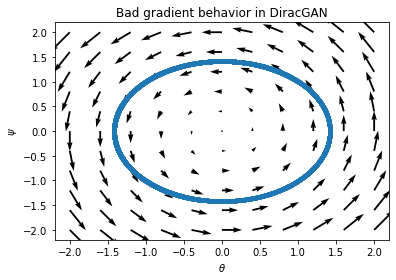

In [110]:
import numpy as np
from matplotlib import pyplot as plt

# Simulated optimization:
n, learning_rate, nd, theta_clip = 10000, 1e-3, 1, None
#n, learning_rate, nd, theta_clip = 10000, 1e-3, 5, 0.5
thetas, psis = np.ones((n,)), np.ones((n,))
for i in range(1,n):
    # Discriminator:
    delta_psi = thetas[i-1]*learning_rate
    psis[i] = psis[i-1] + nd*delta_psi
    
    # Generator:
    delta_theta = -psis[i-1]*learning_rate
    thetas[i] = thetas[i-1] + delta_theta
    
    # Discriminator weight clipping:
    if theta_clip is not None:
        if psis[i] > theta_clip: psis[i] = theta_clip
        if psis[i] < -theta_clip: psis[i] = -theta_clip

# The parameters update vector field:
theta, psi = np.meshgrid(np.linspace(-2,2,11), np.linspace(-2,2,11))
delta_theta = -psi*learning_rate
delta_psi = theta*learning_rate

# Visualizing the evolution:
plt.quiver(theta, psi, delta_theta, delta_psi)
plt.plot(thetas, psis, '.')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\psi$')
plt.title('Bad gradient behavior in DiracGAN')
plt.show();

Regularizing on squared norm of the discriminator's gradients:

$$\large
R(\psi) = \frac{\gamma}{2}\psi^2
$$

Having now $\mathcal{L} = \psi \cdot \theta - \frac{\gamma}{2}\psi^2$ the updates are:

- discriminator: $\frac{\partial\mathcal{L}}{\partial\psi} = \theta - \gamma\psi$
- generator: $-\frac{\partial\mathcal{L}}{\partial\theta} = -\psi$

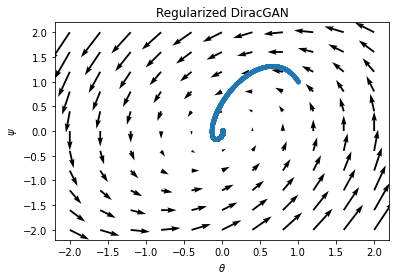

In [135]:
import numpy as np
from matplotlib import pyplot as plt

# Simulated optimization:
n, learning_rate, nd, gamma = 10000, 1e-3, 5, 0.5
# n, learning_rate, nd, gamma = 10000, 1e-3, 5, 2
thetas, psis = np.ones((n,)), np.ones((n,))
for i in range(1,n):
    # Discriminator:
    psi = psis[i-1]
    for _ in range(nd):
        delta_psi = (thetas[i-1] - gamma*psi)*learning_rate
        psi = psi + delta_psi
    psis[i] = psi
    
    # Generator:
    delta_theta = -psis[i-1]*learning_rate
    thetas[i] = thetas[i-1] + delta_theta

# The parameters update vector field:
theta, psi = np.meshgrid(np.linspace(-2,2,11), np.linspace(-2,2,11))
delta_theta = -psi*learning_rate
delta_psi = (theta-gamma*psi)*learning_rate

# Visualizing the evolution:
plt.quiver(theta, psi, delta_theta, delta_psi)
plt.plot(thetas, psis, '.')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\psi$')
plt.title('Regularized DiracGAN')
plt.show();

Experimented with many GAN types:

<img src="images/GAN_regularization.png" width="400pt"/>

Generalizing to more complex distributions:

$$\large
R_1(\psi) = \frac{\gamma}{2} \mathbb{E}_{p_r}[\|\nabla D_\psi(x)\|^2]
$$

$$\large
R_2(\theta,\psi) = \frac{\gamma}{2} \mathbb{E}_{p_g(\theta)}[\|\nabla D_\psi(x)\|^2]
$$

Circle distribution, discriminator gradient magnitudes near Nash equilibrium:

<img src="images/GAN_r1r2.png" width="750pt"/>